In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#loading the data into dataframe using pandas
df = pd.read_csv('craiglist_cleaned_data')

In [3]:
#checking the datatype of columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431209 entries, 0 to 431208
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     431209 non-null  int64  
 1   region         431209 non-null  object 
 2   price          431209 non-null  int64  
 3   year           431209 non-null  float64
 4   manufacturer   431209 non-null  object 
 5   model          431209 non-null  object 
 6   condition      431209 non-null  object 
 7   cylinders      431209 non-null  int64  
 8   fuel           431209 non-null  object 
 9   odometer       431209 non-null  float64
 10  title_status   431209 non-null  object 
 11  transmission   431209 non-null  object 
 12  drive          431209 non-null  object 
 13  size           431209 non-null  object 
 14  type           431209 non-null  object 
 15  paint_color    301808 non-null  object 
 16  state          431209 non-null  object 
 17  lat            424319 non-nul

In [4]:
#summary fo dataframe
df.describe()

,Unnamed: 0,price,year,cylinders,odometer,lat,long,posting_year,posting_month,age
count,431209.000000,4.312090e+05,431209.000000,431209.000000,4.312090e+05,424319.000000,424319.000000,431209.0,431209.000000,431209.000000
mean,215604.000000,2.528218e+04,2011.082554,3.737028,1.014030e+05,38.573630,-94.467829,2020.0,11.200497,8.917446
std,124479.460451,5.525037e+06,8.135120,3.121975,3.120471e+06,5.866900,17.970413,0.0,0.400384,8.135120
min,0.000000,0.000000e+00,1900.000000,0.000000,0.000000e+00,-82.607549,-164.091797,2020.0,10.000000,-1.000000
25%,107802.000000,4.995000e+03,2008.000000,0.000000,4.299600e+04,34.710800,-110.927661,2020.0,11.000000,4.000000
50%,215604.000000,1.099500e+04,2013.000000,4.000000,9.073400e+04,39.286850,-88.435410,2020.0,11.000000,7.000000
75%,323406.000000,2.140000e+04,2016.000000,6.000000,1.350000e+05,42.514300,-81.130653,2020.0,11.000000,12.000000
max,431208.000000,3.615215e+09,2021.000000,12.000000,2.043756e+09,82.049255,150.898969,2020.0,12.000000,120.000000


To find the best possible deal on an used vehicles, we must first take into consideration the general preferences of the average person looking to buy a vehicle. Therefore, in exploring the dataset, we will use 5 categories to find the best type of vehicles available for purchase, in order to find the best deals on a used car.The 5 categories include the vehicle's price, manufacturer,condition, drive and year. A person who are less knowledgeable about vehicle specifications,are more likely to explore these variables, when buying a car. While looking for used cars with familiar manufacturers, at a cheap price, in good condition. Other variables such as vehicle size will also be taken into consideration as customers will also need to consider what vehicle size is more suitable for them.

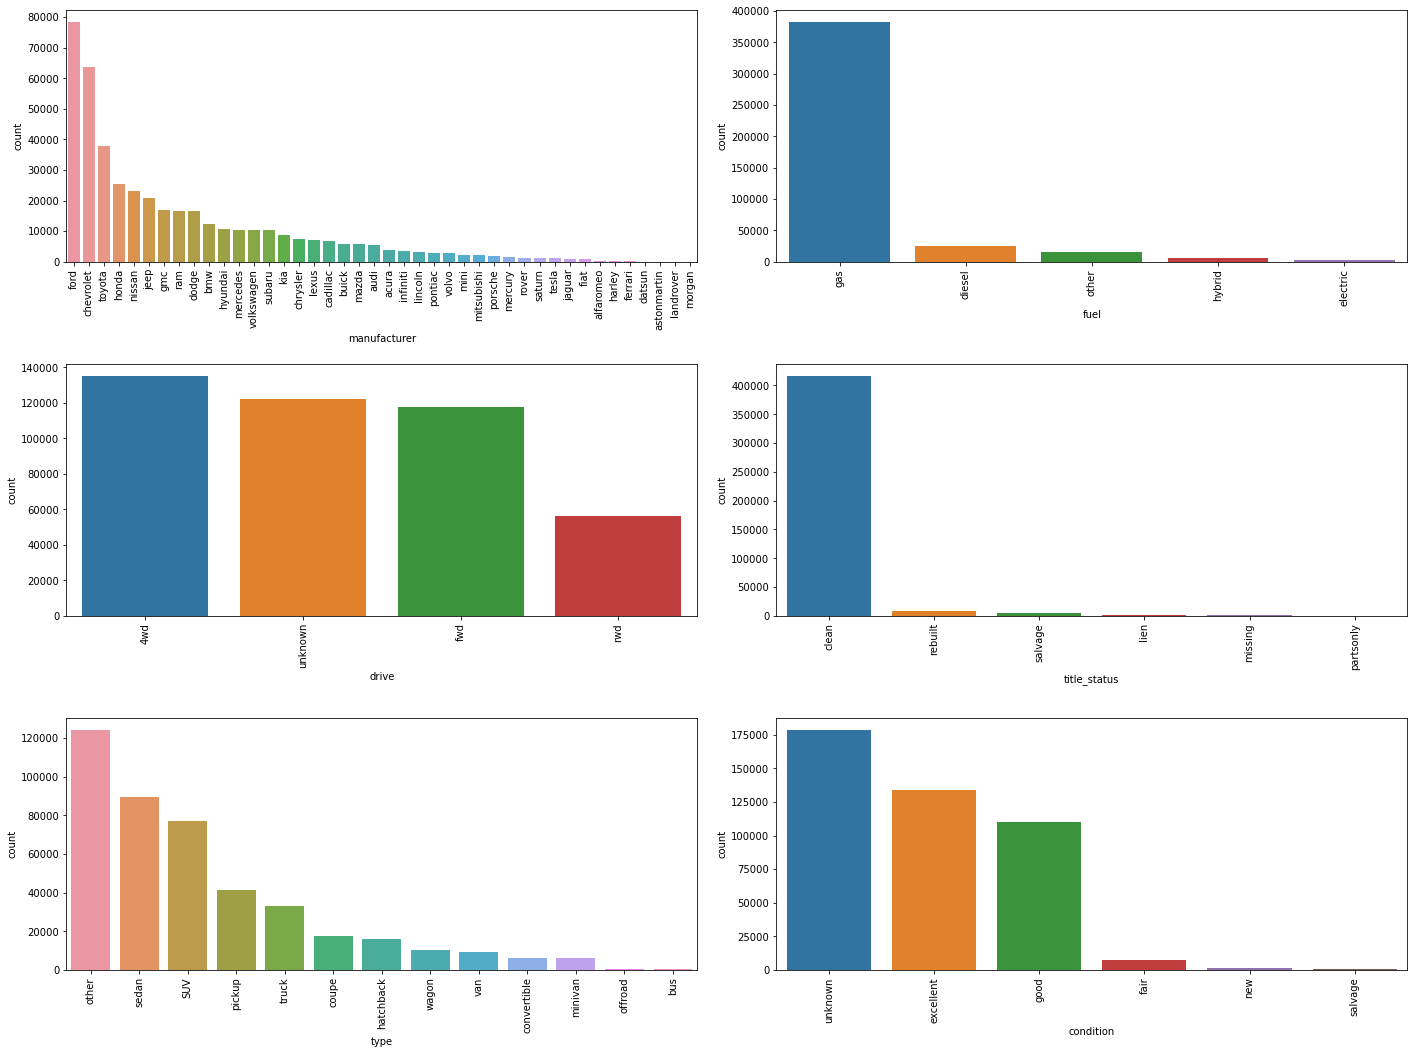

In [5]:
#  Counterplot of manufacturer, fuel, drive, title_staus, type AND condition based on their total number 

cat_type = ['manufacturer', 'fuel', 'drive', 'title_status','type','condition']
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 15)) 

for i, var in enumerate(cat_type):
    row = i//2
    pos = i % 2   
    plot = sns.countplot(x=var, data=df, order = df[var].value_counts().index, ax=axs[row][pos])
    var = plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
fig.tight_layout(pad=2.0)

Here we are looking the distribution of the manufacturing companies within the dataset. Ford has the highest number of vehicles available for purchase, meaning you have a large number of vehicles to choose from. They are followed by chevrolet and toyota. Looking at the fuel type 'gas' has the highest number vehicles available and least are  'electric'. It seems 4 wheel drive is more popular in drive type. Most of vehicles have a clean title status. Sedan has the highest number of vehicles available followed by SUV's. 


Text(0.5, 1.0, 'Top 10 Manufacturer Sale Listing')

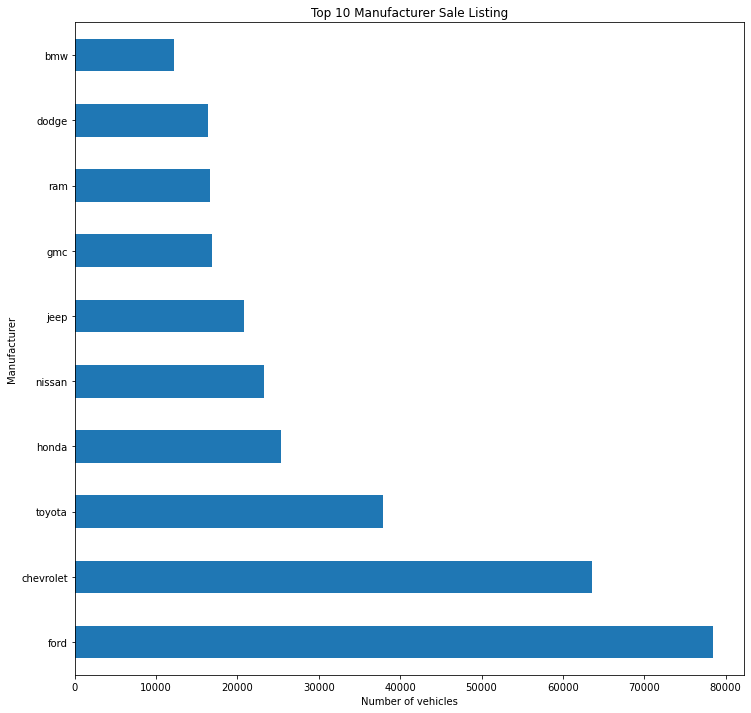

In [6]:
df.manufacturer.value_counts().head(10).plot(kind='barh', subplots=True, figsize=(12, 12))
plt.ylabel('Manufacturer')
plt.xlabel('Number of vehicles')
plt.title('Top 10 Manufacturer Sale Listing')

Here we are looking at the distribution of the top 10 manufacturing companies in the dataset.If you prefer Ford vehicles, Ford has the highest number of vehicles available for purchase, meaning you have a large number of vehicles to choose from. They are followed by chevrolet and toyota. BMW has the lowest number of cars available for sale, so persons who prefer this brand may have a lower chance of finding their ideal vehicle.

Text(0.5, 1.0, 'Top 10 States Sale Listing')

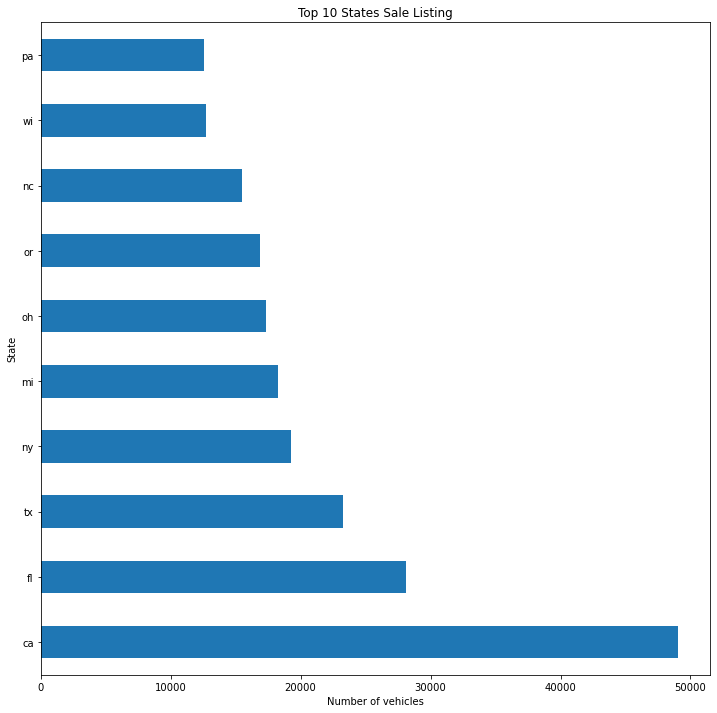

In [7]:
df.state.value_counts().head(10).plot(kind='barh', subplots=True, figsize=(12, 12))
plt.xlabel('Number of vehicles')
plt.ylabel('State')
plt.title('Top 10 States Sale Listing')

Here we are looking at the top 10 distribution of vehicles for sale by state. States such as California, with more population will generally have more vehicles available for purchase than other states. California has the highest number of vehicles for purchase with less than 50,000 vehicles for sale. States such as Pennsylvania will generally have less vehicles available for sale, with lesser population. Pennsylvania has less than 20,000 vehicles available for purchase.

<AxesSubplot:xlabel='Division', ylabel='manufacturer'>

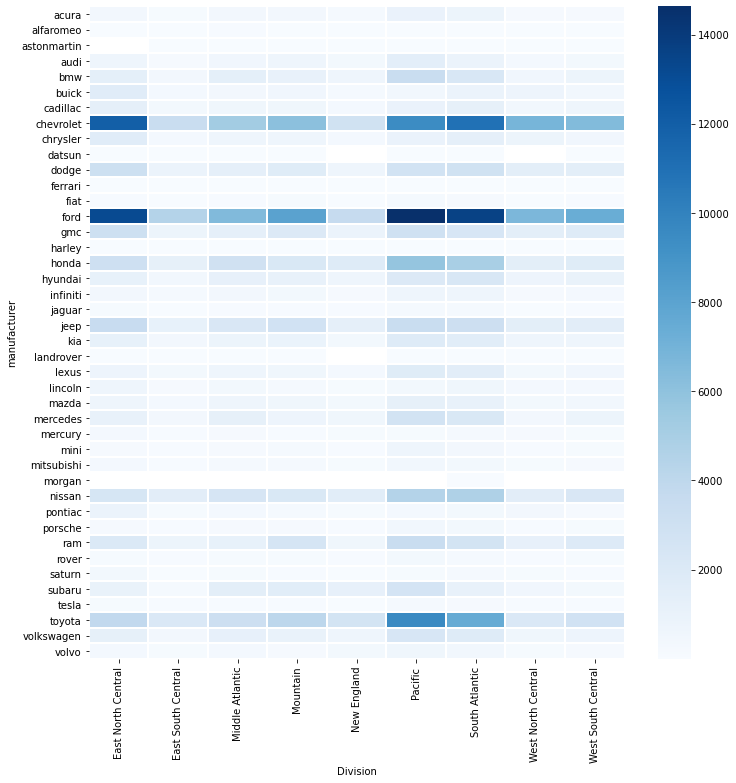

In [8]:
#plotting seaborn heatmap manufacturer sales in different Divisions of US
div_ser = df.groupby('manufacturer').Division.value_counts()
div_ser_df = pd.DataFrame(div_ser.unstack())
plt.subplots(figsize=(12, 12))
sns.heatmap(div_ser_df, cmap='Blues', linecolor='white', linewidth=1)

Here we are observing the most of the vehicles available for sale are in Pacific and South Atlantic Division followed by East North Central Division

<AxesSubplot:xlabel='drive', ylabel='manufacturer'>

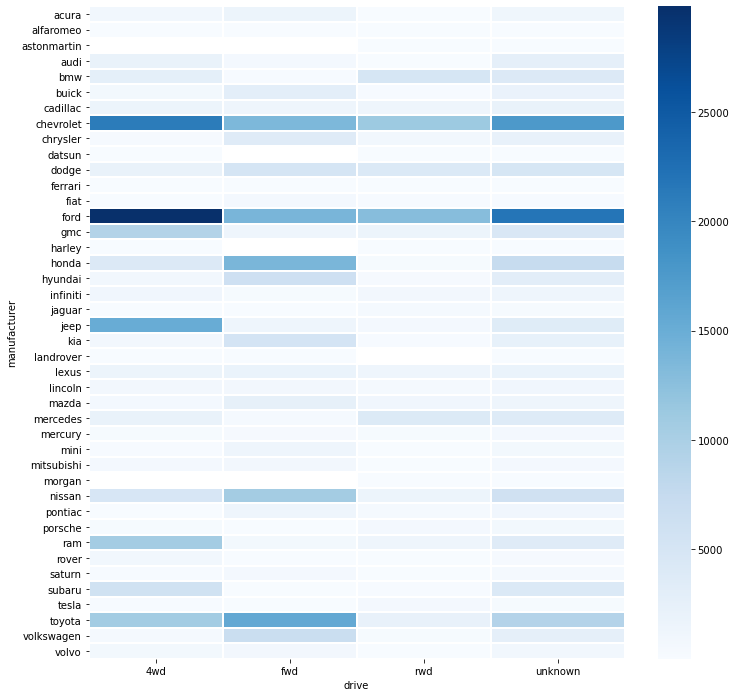

In [9]:
# DRIVE TYPE
drive_ser = df.groupby('manufacturer').drive.value_counts()
drive_ser_df = pd.DataFrame(drive_ser.unstack())

plt.subplots(figsize=(12, 12))
sns.heatmap(drive_ser_df, cmap='Blues', linecolor='white', linewidth=1)

Noticed the large number of 4 wheel drive(4wd) vehicles in all manufacturers are available for sales followed by forward drive(fwd) ones's.

Text(0.5, 0, 'Odometer(Miles)')

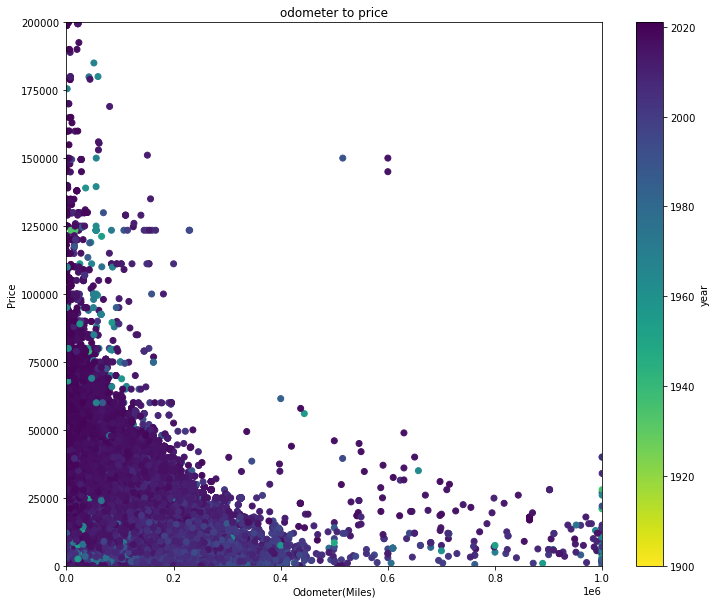

In [10]:
#plotting scatter of price to odometer and hue is year
plt.figure(figsize =(12,10))
plt.scatter(x='odometer', y='price', c= 'year', cmap='viridis_r', data= df)

# plt.clim(0,100000)
plt.colorbar().set_label('year')
plt.title('odometer to price')
plt.ylim(0,200000)
plt.ylabel('Price')
plt.xlim(0,1000000)
plt.xlabel('Odometer(Miles)')

This scatter plots measures prices and odometers.We can clearly see that most of the used vehicles available are manufactured between the years 2000-2020 and also defined fall in price as the odometer increases. 

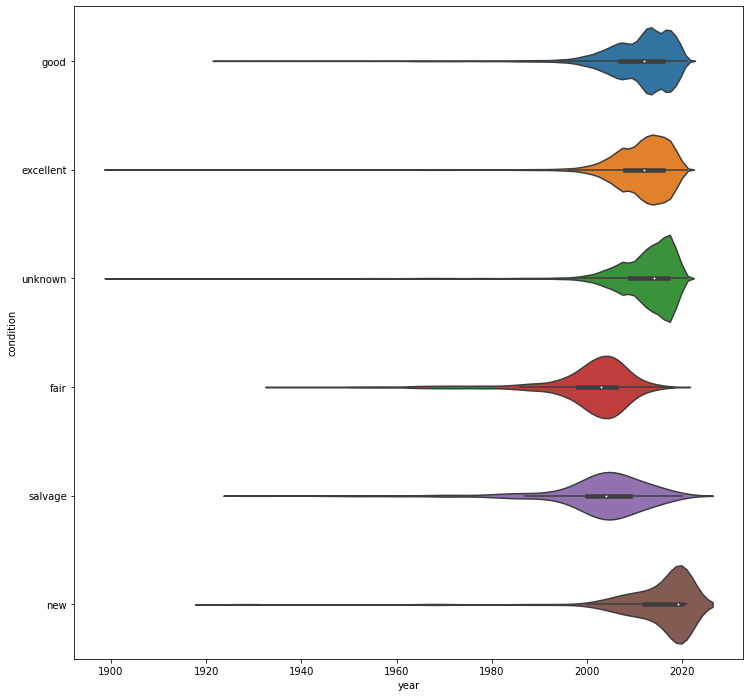

In [11]:
ax = sns.violinplot(x = 'year', y='condition', data=df)
ax.figure.set_size_inches(12,12)

The graph above displays the frequency distributions for cars in the dataset of a certain condition. For persons more concerned about the condition of their vehicles,they will be more likely to consider cars of a new condition, as they would have a more recent year of manufacturing(between 2015-2020). Cars in poor/salvaged condition are most likely depreciated vehicles within the timespan of years 2000-2005. The graph clearly suggests that if you want a vehicle in a great condition, you should purchase a vehicle with a year of manufacturing closest to the most recent year.

The white dot represents the median<br>
The thick gray bar in the center represents the interquartile range<br>
The thin gray line represents the 95% confidence interval<br>
On each side of the gray line is a kernel density estimation to show the distribution shape of the data.<br>
Wider sections of the violin plot represent a higher probability that members of the population will take on the given value;
The skinnier sections represent a lower probability.

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

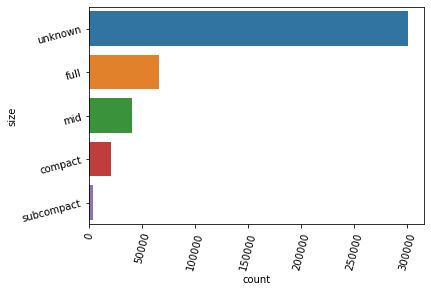

In [12]:
sns.countplot(y='size', data=df)
plt.yticks(rotation=15)
plt.xticks(rotation =75)

This graph shows the number of vehicles for sale within a specific size.
Individuals looking for full-sized vehicles will have more entries<br> to look at, whereas 
persons looking for sub-compact cars will have less entries to look.

Text(0.5, 1.0, 'Number of Cars Sold based on Years Used')

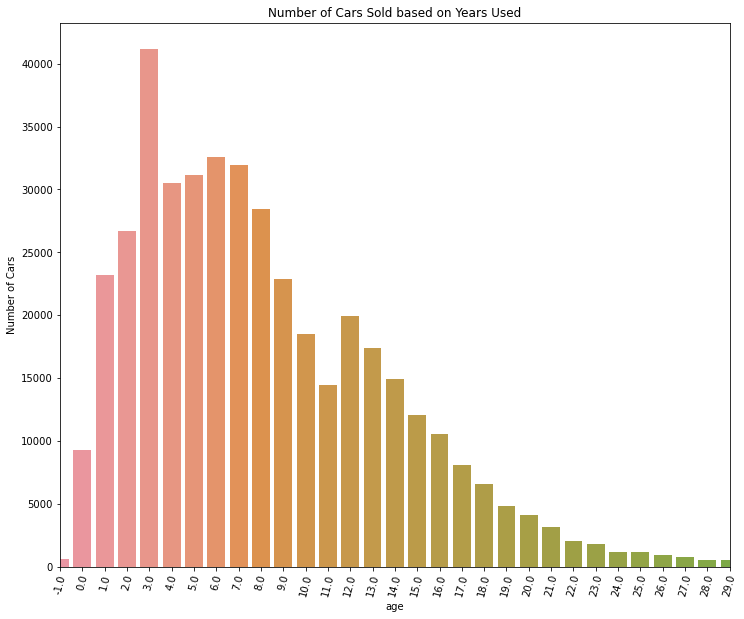

In [13]:
plt.figure(figsize=(12,10))
sns.countplot(x='age',data = df)
plt.xlim(0,30)
plt.xticks(rotation=75)
plt.ylabel('Number of Cars')
plt.xlabel('age')
plt.title('Number of Cars Sold based on Years Used')

**Here in this graph it shows that large number of cars for sale are used less than 10 years.**

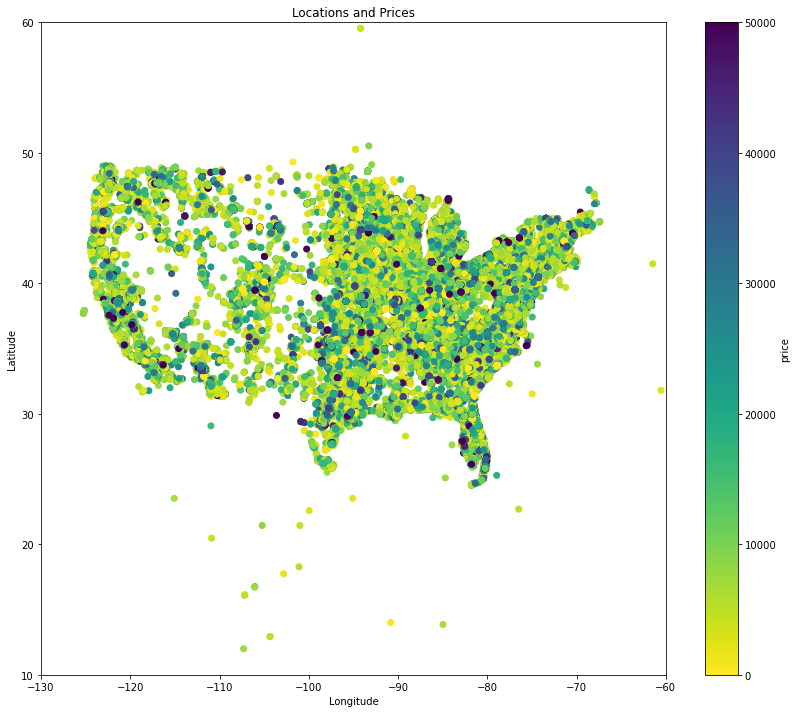

In [14]:
#scatter plot of latitiude and longitude on condition price
plt.figure(figsize=(14,12))
plt.scatter(x='long', y='lat', c ='price' ,  data=df, cmap='viridis_r')

plt.clim(0,50000)
plt.colorbar().set_label('price')
plt.xlim(-130,-60)

plt.ylim(10,60)
plt.xlabel('Longitude')

plt.ylabel('Latitude')
plt.title('Locations and Prices')
plt.show()

**Noticed that most of the sale listing of vehicles in all the locations whose price is less than $30000**

In [15]:
#dropping the columns 
df=df.drop(columns=["posting_date","Unnamed: 0",
                   "posting_month","region","model","state","Region",
                    "posting_year"],axis=1)

<AxesSubplot:title={'center':'Correlation Matrix'}>

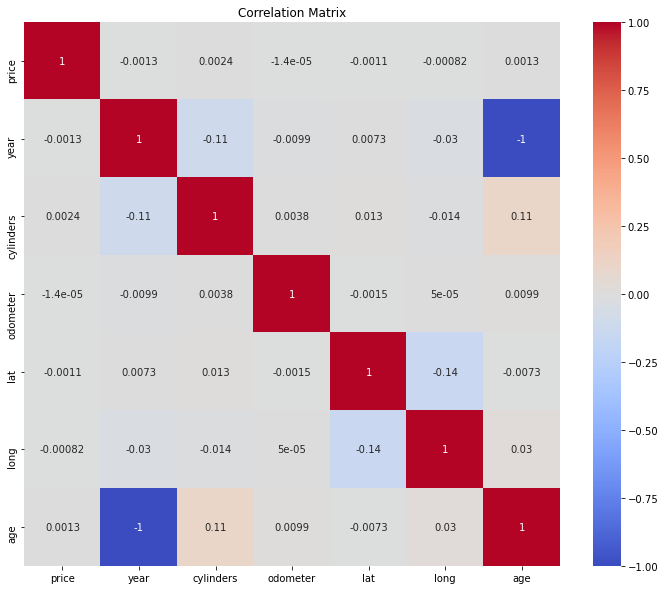

In [16]:
plt.figure(figsize=(12,10))
plt.title('Correlation Matrix')
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

All numeric variables correlations are compared in this graph. Most variables aren't correlated at all, with the negative correlation between price and odometer, price and age, slight negative correlation between year and odometer, and<br> positive correlation between year and price.

# Linearity

**Check for linearity**

Plot a simple linear relationship between two continuous variables and the third one is a optional parameter, this is hue parameter and it takes in categorical columns and kind of helps us to group our data plot as per hue parameter values.

(0.0, 100000.0)

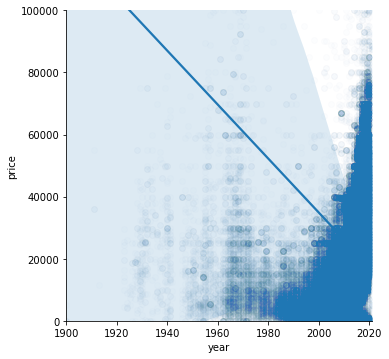

In [17]:
#seaborn linear regression plot
sns.lmplot(x='year',y='price', data=df, scatter_kws={'alpha':0.01})
plt.ylim(0,100000)

This linear line across our plot is the best available fit for the trend of the price with respect to the year vehicle was manufactured that gets generated. And the data points that we see at extreme top which are far away from this line are known as outliers in the dataset. We may think of outliers as exceptions.There is this shadow converging at center where there is a chunk of our data. This convergent point is actually the statistical mean,the generalized prediction of price of vehicles.

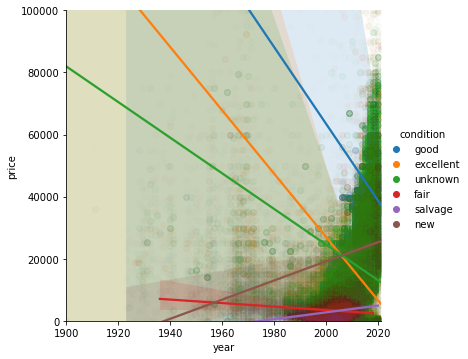

In [18]:
g=sns.lmplot(y='price',x ='year', hue = 'condition', data = df,
          scatter_kws={'alpha':0.01})
plt.ylim(0,100000)
for lh in g._legend.legendHandles:
    lh.set_alpha(1)

In this plot I have add third parameter condition of the vehicle to linear regression plot,it shows vehicles with good<br> condition are priced more compare to other condition.

(0.0, 1000000.0)

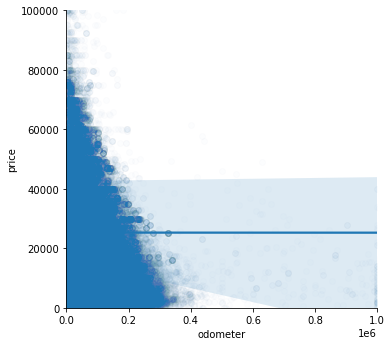

In [19]:
sns.lmplot(x='odometer',y='price', data=df, scatter_kws={'alpha':0.01})
plt.ylim(0,100000)
plt.xlim(0,1000000)

In this plot  the price of the vehicle is high when miles(odometer) vehicles listed are low.

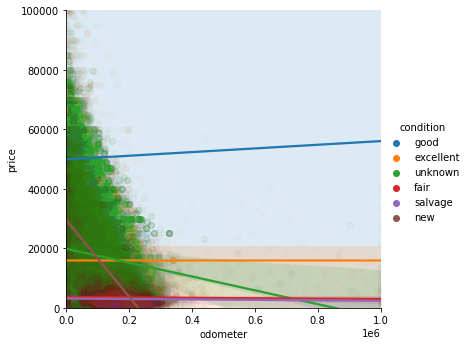

In [20]:
o=sns.lmplot(x='odometer',y='price', hue = 'condition', data = df,
          scatter_kws={'alpha':0.01})
plt.ylim(0,100000)
plt.xlim(0,1000000)
for lh in o._legend.legendHandles:
    lh.set_alpha(1)

The blue line in plot shows that good conditioned vehicles are predicted higher price compare to other.

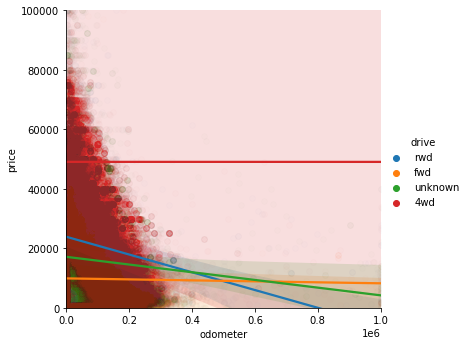

In [20]:
d=sns.lmplot(x='odometer', y ='price', hue = 'drive', data = df,
          scatter_kws={'alpha':0.01})
plt.ylim(0,100000)
plt.xlim(0,1000000)
for lh in d._legend.legendHandles:
    lh.set_alpha(1)

In this regression plot, it shows that the four wheel drive(4wd) vehicles are predicted higher price than other drive.

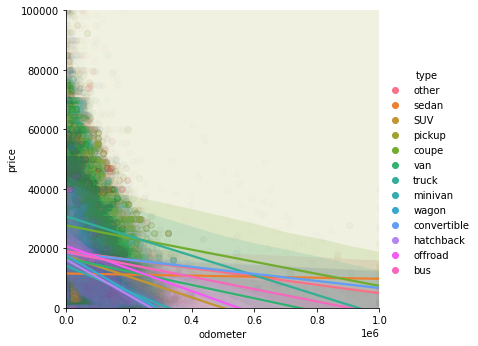

In [21]:
t=sns.lmplot(x='odometer', y ='price', hue = 'type', data = df,
          scatter_kws={'alpha':0.01})
plt.ylim(0,100000)
plt.xlim(0,1000000)
for lh in t._legend.legendHandles:
    lh.set_alpha(1)

In this regression plot, noticed that the price prediction line of sedan type vehicles is consistent even the odometer(miles)  is high.